In [52]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.handlelength'] = 1 
plt.rcParams['legend.handletextpad'] = 0.4  
plt.rcParams['legend.borderaxespad'] = 0.5  
plt.rcParams['legend.labelspacing'] = 0.5


$$\textbf{Ecuación de Lane-Emden}$$

$\begin{equation}
\frac{d^2 \theta}{d \xi^2} + \frac{2}{\xi} \frac{d\theta}{d\xi} = -\theta^n
\end{equation}$

In [53]:
# Parámetros del problema
theta_0 = 1.
dtheta_dxi_0 = 0.
xi_min = 1e-6
xi_max = 50.
Nt = int(1e6)
n_values = np.arange(0, 5.25, 0.5)
initial_conditions = [theta_0, dtheta_dxi_0]

In [54]:
# Clase de Lane-Emden
class LaneEmden:
    def __init__(self, n = n_values, theta_0 = theta_0, dtheta_dxi_0 = dtheta_dxi_0):
        self.n = n  
        self.theta_0 = theta_0  
        self.dtheta_dxi_0 = dtheta_dxi_0  

    def __call__(self, xi, y):
        y1, y2 = y
        dydxi = [y2, -(2/xi)*y2 - y1**self.n] 
        return dydxi

In [55]:
solutions = {}

def stop_when_theta_zero(xi, y):
    return y[0]

stop_when_theta_zero.terminal = True
stop_when_theta_zero.direction = -1

for n in n_values:
    lane_emden = LaneEmden(n=n)
    solution = solve_ivp(
        lane_emden, 
        [xi_min, xi_max], 
        initial_conditions, 
        t_eval=np.linspace(xi_min, xi_max, Nt),
        events=stop_when_theta_zero
    )
    solutions[f"sol_n{n}"] = solution

/tmp/ipykernel_6914/2137807718.py:10: RuntimeWarning: invalid value encountered in scalar power
  dydxi = [y2, -(2/xi)*y2 - y1**self.n]


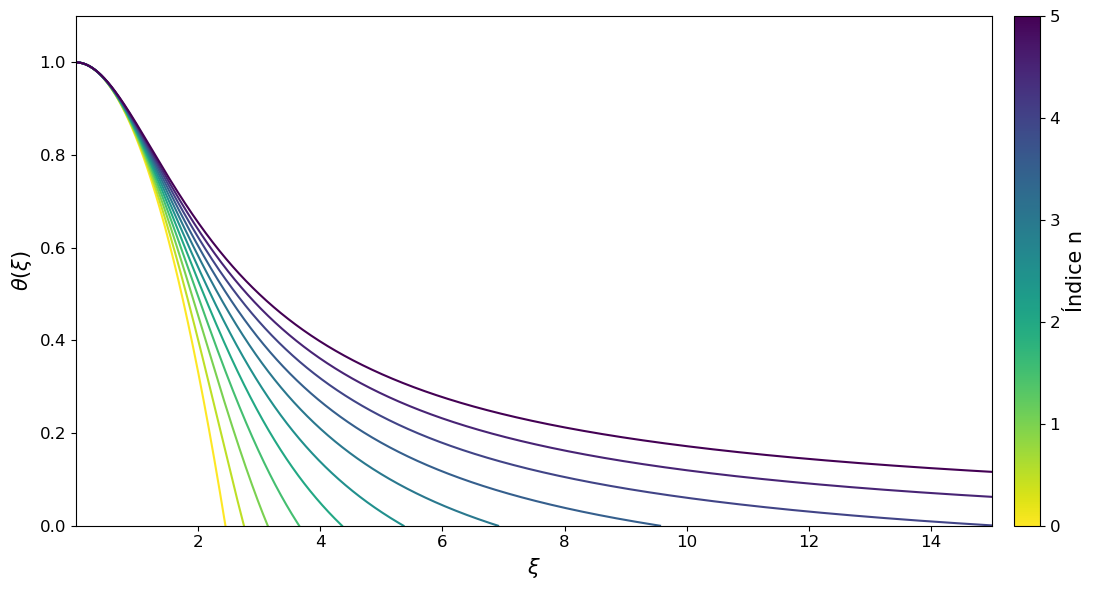

In [56]:
cmap = plt.get_cmap("viridis_r")
n_values = np.arange(0, 5.25, 0.5) 
# cmap = plt.get_cmap("hot_r")
# n_values = np.arange(-1, 5.25, 0.5) 

fig, ax = plt.subplots(figsize=(12, 6))

norm = mpl.colors.Normalize(vmin=min(n_values), vmax=max(n_values))

for i, (n, solution) in enumerate(solutions.items()):
    n_value = n.replace("sol_n", "")
    color = cmap(norm(float(n_value)))
    ax.plot(solution.t, solution.y[0], label=rf'n = {n_value}', color=color)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r'Índice n', fontsize=15)
cbar.set_ticks([0,1,2,3,4,5])

ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\theta(\xi)$')
ax.set_ylim(0, 1.1)
ax.set_xlim(xi_min, 15)
# ax.set_title('Solución de la ecuación de Lane-Emden')

plt.tight_layout()
# plt.legend()
plt.show()
plt.show()

fig.savefig('/home/pablo/Desktop/master/estelar/practica_2/latex/images/Lane-Emden_solution.pdf')

$$\textbf{Comparación teórica}$$

$$
\theta(\xi) =
\begin{cases}
1 - \frac{\xi^2}{6} & \text{si } n = 0 \\
\frac{\sin(\xi)}{\xi} & \text{si } n = 1 \\
\frac{1}{\sqrt{1 + \frac{\xi^2}{3}}} & \text{si } n = 5
\end{cases}

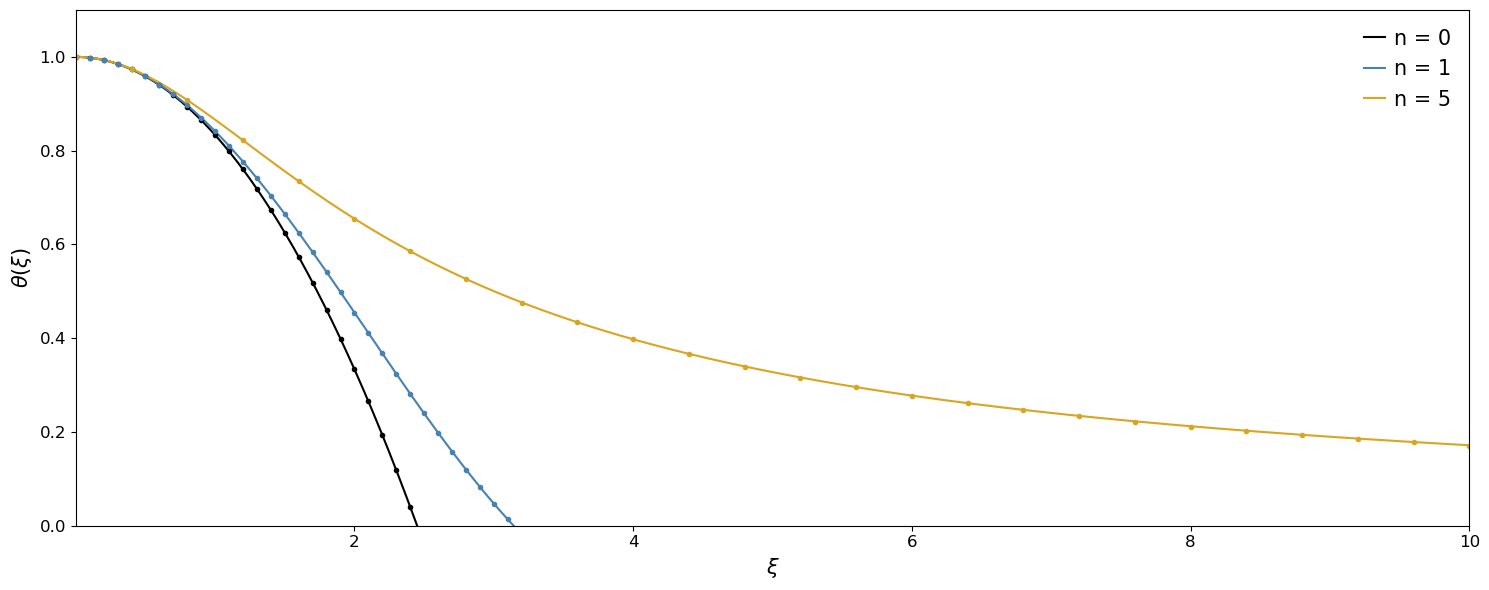

In [78]:
sol_theo_n0 = 1 - solutions['sol_n0.0'].t**2 / 6
sol_theo_n1 = np.sin(solutions['sol_n1.0'].t) / solutions['sol_n1.0'].t
sol_theo_n5 = 1 / (np.sqrt(1 + solutions['sol_n5.0'].t**2 /3))

fig_theo, ax = plt.subplots(figsize=(15, 6))

ax.plot(solutions['sol_n0.0'].t, solutions['sol_n0.0'].y[0], label=rf'n = 0', color='k')
ax.plot(solutions['sol_n1.0'].t, solutions['sol_n1.0'].y[0], label=rf'n = 1', color='steelblue')
ax.plot(solutions['sol_n5.0'].t, solutions['sol_n5.0'].y[0], label=rf'n = 5', color='goldenrod')

ax.errorbar(solutions['sol_n0.0'].t[::2000], sol_theo_n0[::2000], fmt='o', markersize=3, color='k')
ax.errorbar(solutions['sol_n1.0'].t[::2000], sol_theo_n1[::2000], fmt='o', markersize=3, color='steelblue')
ax.errorbar(solutions['sol_n5.0'].t[::8000], sol_theo_n5[::8000], fmt='o', markersize=3, color='goldenrod')

ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\theta(\xi)$')
ax.set_ylim(0, 1.1)
ax.set_xlim(xi_min, 10)

plt.tight_layout()
plt.legend()
plt.show()
plt.show()

fig_theo.savefig('/home/pablo/Desktop/master/estelar/practica_2/latex/images/Lane-Emden_theoretical_solution.pdf')

$$\textbf{Cálculo de parámetros}$$

$$
R_{n} = \xi_{1}
$$

$$
M_{n} = -\xi_{1}^{2} \left ( \frac{d \theta}{d \xi} \right )_{\xi_1}
$$

$$
D_{n} = - \left [ \frac{3}{\xi_1} \left ( \frac{d \theta}{d \xi} \right )_{\xi_1} \right ]^{-1}
$$

$$
B_{n} = \frac{(3 D_n)^{\frac{3-n}{3n}}}{(n+1) M_n^{\frac{n-1}{n}} R_n^{\frac{3-n}{n}}}
$$

In [58]:
xi_1 = np.zeros_like(n_values)
R_n = np.zeros_like(n_values)
M_n = np.zeros_like(n_values)
D_n = np.zeros_like(n_values)
B_n = np.zeros_like(n_values)

dtheta_dxi = {}

for ii, (n, solution) in enumerate(solutions.items()):
    n_value = n.replace("sol_n", "")
    xi_1[ii] = solution.t[-1]

for ii, (n, solution) in enumerate(solutions.items()):
    n_value = n.replace("sol_n", "")
    dtheta_dxi_i = np.zeros(solution.t.size - 1)
    for jj in range(solution.t.size - 1):
        dtheta_dxi_i[jj] = (solution.y[0, jj+1] - solution.y[0, jj]) / (solution.t[jj+1] - solution.t[jj])
    dtheta_dxi[f'{n}'] = dtheta_dxi_i

for ii, (derivative) in enumerate(dtheta_dxi.items()):
    R_n[ii] = xi_1[ii]
    M_n[ii] = - xi_1[ii]**2 * derivative[1][-1]
    D_n[ii] = - ((3 / xi_1[ii]) * derivative[1][-1])**(-1)
    B_n[ii] = (3 * D_n[ii])**((3 - n_values[ii]) / (3 * n_values[ii])) / ((n_values[ii] + 1) * M_n[ii]**((n_values[ii] - 1) / n_values[ii]) * R_n[ii]**((3 - n_values[ii]) / n_values[ii]))


/tmp/ipykernel_6914/1013535399.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  B_n[ii] = (3 * D_n[ii])**((3 - n_values[ii]) / (3 * n_values[ii])) / ((n_values[ii] + 1) * M_n[ii]**((n_values[ii] - 1) / n_values[ii]) * R_n[ii]**((3 - n_values[ii]) / n_values[ii]))
/tmp/ipykernel_6914/1013535399.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  B_n[ii] = (3 * D_n[ii])**((3 - n_values[ii]) / (3 * n_values[ii])) / ((n_values[ii] + 1) * M_n[ii]**((n_values[ii] - 1) / n_values[ii]) * R_n[ii]**((3 - n_values[ii]) / n_values[ii]))


In [59]:
print(r"\begin{table}[h!]")
print(r"\centering")
print(r"\begin{tabular}{c c c c c}")
print(r"\hline")
print(r"$n$ & $R_n$ & $M_n$ & $D_n$ & $B_n$ \\")
print(r"\hline")
for i in range(len(n_values)):
    print(f"{n_values[i]} & {R_n[i]:.2f} & {M_n[i]:.2f} & {D_n[i]:.2f} & {B_n[i]:.2f} \\\\")
print(r"\hline")
print(r"\end{tabular}")
print(r"\caption{Valores de $R_n$, $M_n$, $D_n$ y $B_n$ para índices politrópicos desde 0 hasta 5. Para el cálculo en $n$ = 0, 1 y 5 se han tomado límites.}")
print(r"\label{table:polytrope_values}")
print(r"\end{table}")

\begin{table}[h!]
\centering
\begin{tabular}{c c c c c}
\hline
$n$ & $R_n$ & $M_n$ & $D_n$ & $B_n$ \\
\hline
0.0 & 2.45 & 4.90 & 1.00 & nan \\
0.5 & 2.75 & 3.79 & 1.83 & 0.27 \\
1.0 & 3.14 & 3.15 & 3.28 & 0.23 \\
1.5 & 3.66 & 2.71 & 6.01 & 0.21 \\
2.0 & 4.36 & 2.41 & 11.44 & 0.19 \\
2.5 & 5.36 & 2.19 & 23.53 & 0.17 \\
3.0 & 6.91 & 2.02 & 54.54 & 0.16 \\
3.5 & 9.56 & 1.89 & 154.24 & 0.15 \\
4.0 & 15.08 & 1.79 & 637.52 & 0.14 \\
4.5 & 32.61 & 1.73 & 6680.00 & 0.13 \\
5.0 & 50.00 & 1.72 & 24245.22 & 0.12 \\
\hline
\end{tabular}
\caption{Valores de $R_n$, $M_n$, $D_n$ y $B_n$ para índices politrópicos desde 0 hasta 5. Para el cálculo en $n$ = 0, 1 y 5 se han tomado límites.}
\label{table:polytrope_values}
\end{table}


$$\textbf{Cálculo del radio, masa y densidad}$$

$$\alpha^{2} = \frac{(n+1)K}{4\pi G \rho_{c}^{\frac{n-1}{n}}} \ \ ; \ \ K = 10^{7} / (\mu_e^{\gamma}) \ [m^4 kg^{-2/3} s^{-2}] \ \ ; \ \ \mu_e = 2 \ \ ; \ \ \gamma = 5/3$$

$\begin{equation}
M = -4 \pi \alpha^{3} \rho_{c} \xi^{2} \left ( \frac{d\theta}{d\xi} \right )_{\xi_1} 
\end{equation}$

$\begin{equation}
R = \alpha \xi_1 
\end{equation}$

$\begin{equation}
\left ( \frac{G M}{M_n} \right )^{n-1} \left ( \frac{R}{R_n} \right )^{3-n} = \frac{[(n+1)K]^{n}}{4 \pi G}
\end{equation}$

$\begin{equation}
\rho = \rho_c  \theta^{n}
\end{equation}$

$\begin{equation}
r = \xi \alpha / R_{\odot}
\end{equation}$

$\begin{equation}
\rho_c = D_n \frac{3M}{4 \pi R^{3}}
\end{equation}$


In [60]:
n = 1.5
K = 1e7 / (2**(5/3))
G = 6.674*(10**(-11))
r_sol = 6.96 * 10**8
m_sol = 2 * 10**30
m_sol_wd = 0.5405 

rho_c = np.array([5*1e8, 1e9, 1.2*1e9, 5*1e9])

In [61]:
alpha = np.sqrt(((n + 1)*K) / (4 * np.pi * G * rho_c**((n-1)/n)))

M = np.zeros([4, solutions['sol_n1.5'].t.size - 1])
R = np.zeros([4, solutions['sol_n1.5'].t.size - 1])
rho = np.zeros([4, solutions['sol_n1.5'].t.size - 1])

for ii in range(4):
    M[ii] = -4 * np.pi * alpha[ii]**3 * rho_c[ii] * solutions['sol_n1.5'].t[:-1]**2 * dtheta_dxi['sol_n1.5'] / m_sol
    R[ii] = alpha[ii] * solutions['sol_n1.5'].t[:-1] / r_sol
    rho[ii] = rho_c[ii] * solutions['sol_n1.5'].y[0][:-1]**n

M_M_sol = ((n+1)*K)**(n/(n-1)) / (4*np.pi*G)**(1/(n-1)) * (R_n[3]/(R*r_sol))**((3-n)/(n-1)) * M_n[3] / G / m_sol


In [62]:
print(r"\begin{table}[h!]")
print(r"\centering")
print(r"\begin{tabular}{c c c c c}")
print(r"\hline")
print(r" & WD 1 & WD 2 & Sol & WD 3 \\")
print(r"\hline")
print(r"$\rho_c$ & $ 5 \cdot 10^{8}$ & $10^{9}$ & $1.2 \cdot 10^{9}$ & $5 \cdot 10^{9}$ \\")
print(r"$M/M_{\odot}$ & ", f"{M[0][-1]:.3f} & {M[1][-1]:.3f} & {m_sol_wd} & {M[3][-1]:.3f} \\\\")
print(r"$R/R_{\odot}$ & ", f"{R[0][-1]:.3f} & {R[1][-1]:.3f} & {R[2][-1]:.4f} & {R[3][-1]:.3f} \\\\")
print(r"\hline")
print(r"\end{tabular}")
print(r"\caption{Densidades centrales, masas y radios de las 3 enanas blancas (WDs) bajo estudio y el Sol como futura enana blanca.}")
print(r"\label{table:masa_radio}")
print(r"\end{table}")

\begin{table}[h!]
\centering
\begin{tabular}{c c c c c}
\hline
 & WD 1 & WD 2 & Sol & WD 3 \\
\hline
$\rho_c$ & $ 5 \cdot 10^{8}$ & $10^{9}$ & $1.2 \cdot 10^{9}$ & $5 \cdot 10^{9}$ \\
$M/M_{\odot}$ &  0.347 & 0.490 & 0.5405 & 1.096 \\
$R/R_{\odot}$ &  0.018 & 0.016 & 0.0156 & 0.012 \\
\hline
\end{tabular}
\caption{Densidades centrales, masas y radios de las 3 enanas blancas (WDs) bajo estudio y el Sol como futura enana blanca.}
\label{table:masa_radio}
\end{table}


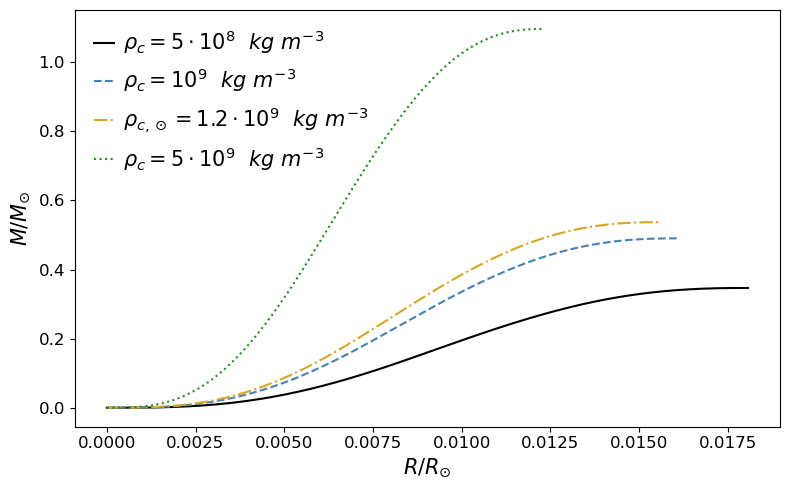

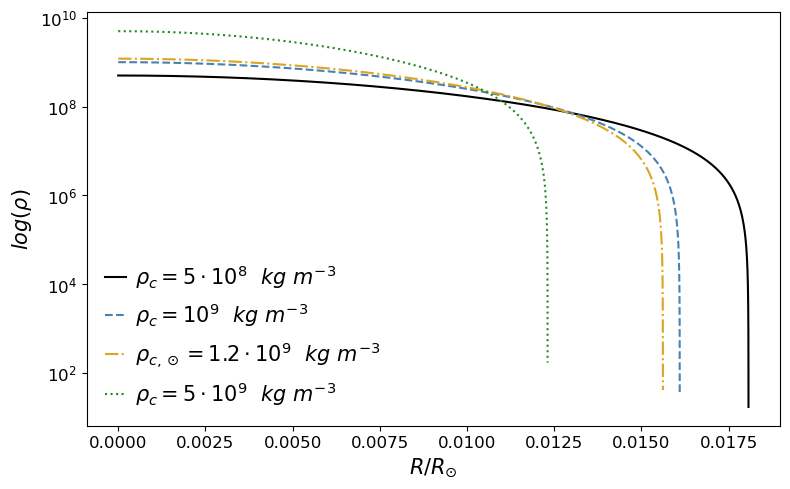

In [77]:
labels = [r'$\rho_c = 5 \cdot 10^{8} \ \ kg \ m^{-3}$', r'$\rho_c = 10^{9} \ \ kg \ m^{-3}$', r'$\rho_{c, \odot} = 1.2 \cdot 10^{9} \ \ kg \ m^{-3}$', r'$\rho_c = 5 \cdot 10^{9} \ \ kg \ m^{-3}$']
colors = ['k', 'steelblue', 'goldenrod', 'forestgreen']
ls = ['-', '--', '-.', ':']

fig_mass = plt.figure(figsize=(8,5))

for ii in range(4):
    plt.plot(R[ii], M[ii], color=colors[ii], ls=ls[ii], label=labels[ii])

plt.xlabel(r'$R/R_{\odot}$')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend()
plt.tight_layout()
plt.show()

fig_density = plt.figure(figsize=(8,5))

for ii in range(4):
    plt.plot(R[ii], rho[ii], color=colors[ii], ls=ls[ii], label=labels[ii])

plt.yscale('log')
plt.xlabel(r'$R/R_{\odot}$')
plt.ylabel(r'$log(\rho)$')
plt.legend()
plt.tight_layout()
plt.show()

fig_mass.savefig('/home/pablo/Desktop/master/estelar/practica_2/latex/images/mass_radius.pdf')
fig_density.savefig('/home/pablo/Desktop/master/estelar/practica_2/latex/images/density_radius.pdf')